<h1 style='font-size:40px'> Case Engenharia de ML</h1>
<div> 
    <ul style='font-size:20px'>
        <li> 
            Este arquivo contém a resolução dos desafios propostos para o case de Engenharia de ML.
        </li>
    </ul>
</div>

<h2 style='font-size:30px'> Desafio 1</h2>
<div> 
    <ul style='font-size:20px'>
        <li> 
            A CRISP-DM é a principal metodologia utilizada em projetos de Ciência de Dados e Mineração de Dados.
        </li>
        <li> 
            Ela é dividida em 6 etapas principais. Nós exemplificaremos cada uma delas nos baseando em um projeto de previsão de NPL's:
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Entendimento do Negócio</h3>
<div> 
    <ul style='font-size:20px'>
        <li> 
            Nessa fase, o Cientista deve conhecer as atividades da área de negócio e entender as suas ambições envolvendo o projeto. 
        </li>
        <li> 
            Uma vez feito isso, ele deve acordar com a área cliente o critério de sucesso a ser usado.
        </li>
        <li> 
            No contexto de um projeto de previsões de NPL, é fundamental o Cientista de Dados conhecer as principais avaliações para concessão de crédito do banco. Uma vez feito isso, ele deve estabelecer os critérios que definirão o sucesso do modelo a ser produzido. 
            <p style='margin-top:10px'> 
                <i>Obs</i>: Pode-se existir um critério de negócio (redução em x% dos NPL's) e um técnico (acréscimo de x% no f1-score do algoritmo).
            </p>
        </li>
     </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Entendimento dos Dados</h3>
<div> 
    <ul style='font-size:20px'>
        <li> 
            Iniciamos essa etapa definindo quais dados nosso projeto precisará e em quais bases podemos obtê-los. É interessante consultar os Arquitetos e Engenheiros de Dados a fim de sanarmos essas questões e montarmos o dataset do trabalho.
        </li>
        <li> 
            Tendo os dados em mãos, podemos iniciar a nossa EDA. Nela, identificaremos padrões e relações entre as informações. É essencial localizarmos possíveis problemas nos dados, como outliers e valores nulos. 
        </li>
        <li> 
            No contexto de um projeto de NPL's, deveremos obter acesso às bases de empréstimos e clientes e estudar os dados. Na análise, temos entender as principais diferenças das informações de clientes inadimplentes e os com pagamento em dia. 
        </li>
     </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Preparação dos dados</h3>
<div> 
    <ul style='font-size:20px'>
        <li> 
            Consiste no devido tratamento dos dados para que eles sejam recebidos por um modelo de I.A.
        </li>
        <li> 
            Nessa etapa, escolhemos os atributos com os quais trabalharemos; tratamos valores nulos e strings; e normalizamos os dados numéricos. Temos que nos preocupar com a remoção outliers (usando IQR, $\sigma$...) e dados categóricos de pouca presença no dataset.
        </li>
        <li> 
            Quando montamos uma I.A baseada em dados de clientes bancários, precisamos substituir informações categóricas por dados numéricos (usando um GROUP BY, por exemplo). Podemos preencher nulos com Imputers pré-programados de nossos frameworks.
        </li>
     </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Modelagem</h3>
<div> 
    <ul style='font-size:20px'>
        <li> 
            Tendo os dados tratados, estamos aptos para criar os algoritmos de Machine Learning. Mas, antes de iniciarmos os fittings, devemos segregar a nossa matriz em um set de treino, validação e teste. Isso, a fim de evitarmos o overfitting dos algoritmos.
        </li>
        <li> 
            Uma vez segregada a matriz, iniciamos o treinamento de diversos tipos de modelos. Buscamos sempre encontrar a melhor combinação de hiperparâmetros treinando-os no set de treino e avaliando-os no set de validação.
        </li>
        <li> 
            Os candidatos a deployment vão ser aqueles que atingiram as melhores métricas qualitativas no set de teste. No caso de um previsor de NPL's , essa seleção pode ser baseada na pontuação de um $f_{\text{beta}}$, ou uma ROC-AUC por exemplo.
        </li>
     </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Avaliação</h3>
<div> 
    <ul style='font-size:20px'>
        <li> 
            Nessa fase, verificamos se os nossos algoritmos correspondem aos critérios do time de negócio. No caso, não nos preocupamos apenas com a performance, como também com as exigências de interpretabilidade dos modelos. Além disso, podem existir regras sobre o tamanho máximo que o arquivo do modelo pode ter no ambiente de produção.
        </li>
        <li> 
            Selecionamos o algoritmo que melhor se adequa a todas as regras do projeto e o levamos ao ambiente de produção.
        </li>
        <li> 
            O time de negócios poderia demandar que o modelo retorne uma probabilidade, ao invés de uma classe em si. Além disso, é posível os Arquitetos de Cloud da empresa obriguem que o arquivo não ultrapasse 2GB.
        </li>
     </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Deployment</h3>
<div> 
    <ul style='font-size:20px'>
        <li> 
            O Deployment nada mais é do que a implantação do modelo escolhido em produção. O Cientista, auxiliado por profissionais de T.I, disponibilizará o algoritmo por meio de uma API. É por meio dela que o time de negócios obterá as previsões da IA.
        </li>
        <li> 
            As particularidades do Deployment dependerão de onde o modelo será implantado (em servidores locais, ou na nuvem).
        </li>
     </ul>
</div>

<h2 style='font-size:30px'> Desafio 2</h2>
<div> 
    <ul style='font-size:20px'>
        <li> 
            Iniciaremos por aqui o carregamento das bases do projeto e realização da EDA.
        </li>
        <li> 
            Como o esquema da Base de Dados nos mostra, temos acesso tanto aos dados do cliente com a nossa instituição, quanto com outros bancos. Portanto, acredito que a EDA deverá ser feita de maneira apartada para cada espécie de informação.
            <center style='margin-top:20px'> 
                <img src='../img/schema.png'>
            </center>
        </li>
    </ul>
</div>

In [1]:
import pandas as pd

# Permitindo a visualização de todas as colunas de nossos DataFrames.
pd.set_option('display.max_columns', None)

In [2]:
# Carregando os dados do arquivo principal.
df_train = pd.read_csv('/kaggle/input/home-credit-default-risk/application_train.csv')
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
# Vamos aproveitar a situação e criar DataFrames separados para clientes em dia e inadimplentes.
df_train_0 = df_train[df_train['TARGET']==0]
df_train_1 = df_train[df_train['TARGET']==1]

<h3 style='font-size:30px;font-style:italic'> EDA Dados Gerais</h3>
<div> 
    <ul style='font-size:20px'>
        <li> 
            Iniciando a análise envolvendo apenas as informações gerais dos clientes do banco.
        </li>
     </ul>
</div>

<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> Distribuição das Targets</h4>
<div> 
    <ul style='font-size:20px'>
        <li> 
            É muito importante, em qualquer projeto de classificação, conhecermos as proporções de nossas classes-alvo. Essas informações auxiliarão o Cientista de Dados a definir a métrica qualitativa mais apropriada. 
        </li>
        <li> 
            Enxergamos que os inadimplentes representam cerca de 8% do set de treino. 
        </li>
     </ul>
</div>

In [4]:
# Vamos montar uma pequena função responsável por criar gráficos de barras para comparação de proporções.
# Ela será de bastante utilidade na EDA do projeto.
from typing import Iterable
def bar_prop(x:Iterable[int], y:Iterable[float], title:str)->None:
    '''
        Função para montagem de um gráfico de barras voltado à comparação de proporções.

        Parâmetros
        ----------
        `x`:Iterable
            Objeto iterável com as abscissas do gráfico.
        `y`:Iterable
            Objeto iterável com o valor das ordenadas do gráfico.
        `title`: str
            Título do gráfico.
    '''
    # Plotando o gráfico.
    plt.bar(x, y) 
    
    # Definindo título e ticks.
    plt.title(title, pad=20)
    plt.xticks(x)
    plt.yticks([])
    
    # Inserindo o valor das %'s no gráfico.
    for i, p in zip(x, y):
        plt.text(i-7e-2, p+2e-2, f'{round(p, 2)*100}%', fontdict={'size':12})

    # Removendo parte da moldura do gráfico.
    ax = plt.gca()
    ax.spines[['right', 'left', 'top']].set_visible(False);

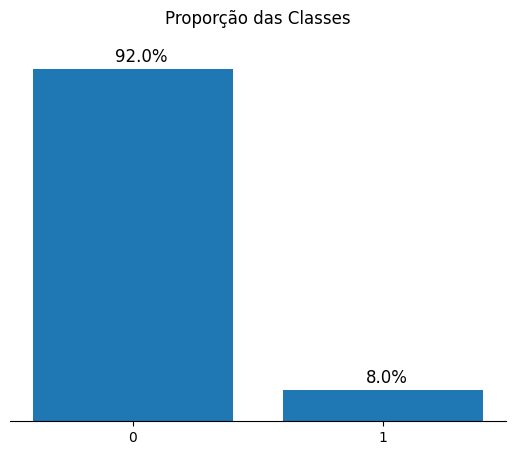

In [5]:
import matplotlib.pyplot as plt

# Extraindo a proporção de ocorrências de cada classe e criando o gráfico de barras.
gb_target = (df_train.groupby('TARGET')['TARGET'].count()/len(df_train))
bar_prop(gb_target.index, gb_target.values, 'Proporção das Classes')

<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> Análise dos Valores dos Empréstimos</h4>
<div> 
    <ul style='font-size:20px'>
        <li> 
            Podemos aproveitar a coluna AMT_CREDIT e estudarmos a distribuição dos valores de contrato de ambas as TARGET'S. 
        </li>
        <li> 
             Será que os inadimplentes contraem empréstimos mais caros do que os demais clientes?
        </li>
     </ul>
</div>

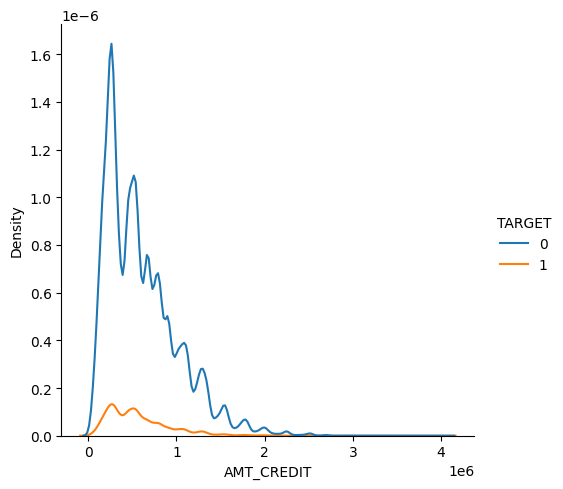

In [6]:
# Analisando as distribuições das TARGET's, percebemos que ambas são positivamente assimétricas.
# Existem outliers bem agudos que podem interferir em nossa EDA.
from seaborn import displot
displot(df_train, x='AMT_CREDIT', hue='TARGET', kind='kde')

In [7]:
# No Group By abaixo, confirmamos a assimetria dos KDE's e notamos que exite também um Excesso de Curtose (curstose-3) elevado nas distribuições,
# sinalizando a presença de outliers.
from scipy.stats import skew, kurtosis
df_train.groupby('TARGET')['AMT_CREDIT'].agg([skew, kurtosis])

,skew,kurtosis
TARGET,,
0,1.220964,1.858898
1,1.333844,2.711417


In [8]:
# Seria prudente desconsiderarmos esses outliers pensando em nossa EDA e modelagem futura.
# Usarei o IQR da coluna a fim de remover esses valores extremos.
from scipy.stats import iqr
iqr_amt_credit = iqr(df_train['AMT_CREDIT'])
df_train = df_train[(df_train['AMT_CREDIT']>(df_train['AMT_CREDIT'].quantile(.25)-iqr_amt_credit))&
         (df_train['AMT_CREDIT']<(df_train['AMT_CREDIT'].quantile(.75)+iqr_amt_credit))]

In [9]:
# Medindo o valor médio e std dos empréstimos entre pessoas em dia e inadimplentes.
# Observando as estatísticas, é bastante provável que as TARGET's tenham valores de contrato estatisticamente iguais. 
df_train.groupby('TARGET')['AMT_CREDIT'].agg(['mean', 'std'])

,mean,std
TARGET,,
0,541211.221443,319416.993696
1,525784.307959,292563.801443


In [10]:
# Realizando uma comparação formal com um Teste de Hipóteses (alpha=.05).
from statsmodels.stats.weightstats import ztest

# H0: O valor dos empréstimos dos clientes em dia e inadimplentes é igual.
# H1: O valor dos empréstimos dos clientes em dia é menor do que o dos inadimplentes.

# O p-valor é maior do que nosso Nível de Significância. Assim, podemos acatar H0.
ztest(df_train[df_train['TARGET']==0]['AMT_CREDIT'], 
      df_train[df_train['TARGET']==1]['AMT_CREDIT'],
      alternative='smaller')[1] # p-valor.

0.9999999999997597

<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> Análise das Rendas</h4>
<div> 
    <ul style='font-size:20px'>
        <li> 
            Podemos aproveitar a coluna AMT_INCOME_TOTAL e estudar a distribuição de rendas de ambas as TARGET'S. 
        </li>
        <li> 
             Será que os inadimplentes têm rendas menores do que os demais clientes?
        </li>
     </ul>
</div>

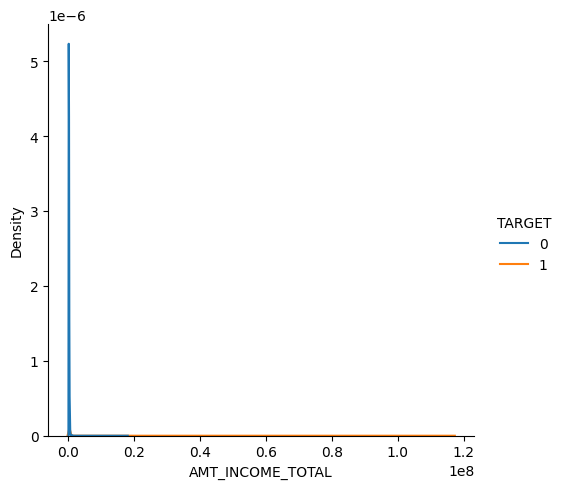

In [11]:
# Apenas olhando o `displot`, reparamos que há uma presença de outliers muito forte na coluna de Income.
displot(df_train, x='AMT_INCOME_TOTAL', hue='TARGET', kind='kde')

In [12]:
# As Assimetrias e Excessos de Curtose são enormes para ambas as TARGET's. Uma nova remoção de outliers é necessária
# para o prosseguimento do projeto.
df_train.groupby('TARGET')['AMT_INCOME_TOTAL'].agg([skew, kurtosis])

,skew,kurtosis
TARGET,,
0,27.313836,4119.325948
1,152.368732,23506.682044


In [13]:
# Medindo o IQR da AMT_INCOME_TOTAL e desconsiderando os outliers.
iqr_amt_income = iqr(df_train['AMT_INCOME_TOTAL'])
df_train = df_train[(df_train['AMT_INCOME_TOTAL']>(df_train['AMT_INCOME_TOTAL'].quantile(.25)-iqr_amt_income))&
         (df_train['AMT_INCOME_TOTAL']<(df_train['AMT_INCOME_TOTAL'].quantile(.75)+iqr_amt_income))]

In [14]:
# Repare na imensa diferença que nossa limpeza de outliers nos proporcionou!
df_train.groupby('TARGET')['AMT_INCOME_TOTAL'].agg([skew, kurtosis])

,skew,kurtosis
TARGET,,
0,0.420775,-0.527583
1,0.441891,-0.443065


In [15]:
# Seguem as estatísticas de renda após o tratamento.
df_train.groupby('TARGET')['AMT_INCOME_TOTAL'].agg(['mean', 'std'])

,mean,std
TARGET,,
0,145515.717855,55533.576716
1,144377.778630,53773.787244


In [16]:
# Conduzindo o Teste (alpha=.05).
# H0: A renda dos clientes em dia e inadimplentes é igual.
# H1: A renda dos clientes em dia é maior do que o dos inadimplentes.

# O p-valor é menor do que nosso Nível de Significância. Assim, podemos rejeitar H0.
ztest(df_train[df_train['TARGET']==0]['AMT_INCOME_TOTAL'], 
      df_train[df_train['TARGET']==1]['AMT_INCOME_TOTAL'],
      alternative='larger')[1] # p-valor.

0.0015301344849970898

<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> Proporção do Crédito Sobre a Renda do Cliente</h4>
<div> 
    <ul style='font-size:20px'>
        <li> 
            Como possuímos features sobre valor do empréstimo e renda do cliente, poderíamos levantar uma hipótese: pessoas com `TARGET==1` se encontram inadimplentes porque os empréstimos que elas contraem representam uma parcela muito grande de sua renda, o que dificultaria o pagamento da dívida. 
        </li>
        <li> 
            Ao mesmo tempo, podemos supor que pessoas não inadimplentes obtêm empréstimos mais conservadores e, assim, mais fáceis de serem quitados. 
        </li>
     </ul>
</div>

In [17]:
# Criando uma coluna com os quocientes entre valor do empréstimo e renda.
df_train['CREDIT_INCOME_RATIO'] = df_train['AMT_CREDIT'] / df_train['AMT_INCOME_TOTAL']

# No entanto, vemos que os quocientes de ambos os grupos apresentam médias e desvios-padrões bastante semelhantes.
# Provavelmente, não existe uma diferença estatisticamente significativa entre o quociente das classes.
df_train.groupby('TARGET')['CREDIT_INCOME_RATIO'].agg(['mean', 'std'])

,mean,std
TARGET,,
0,3.894043,2.552339
1,3.873869,2.440596


In [18]:
# Formalizando a rejeição de nossa hipótese com um ztest (alpha=.05).
from statsmodels.stats.weightstats import ztest

# H0: A razão entre valor do empréstimo e renda dos clientes em dia e inadimplentes é igual.
# H1: A razão entre valor do empréstimo e renda dos clientes em dia é menor do que a dos inadimplentes.

# Como o p-valor do teste foi maior do que nosso Nível de Significância, não possuímos evidências que comprovem que pessoas
# não inadimplentes contraem empréstimos mais "conservadores" do que as com pagamentos em atraso.
ztest(df_train[df_train['TARGET']==0]['CREDIT_INCOME_RATIO'], 
      df_train[df_train['TARGET']==1]['CREDIT_INCOME_RATIO'],
      alternative='smaller')[1] # p-valor.

0.8735817806901931

<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> Comparativo Entre Empregados e Desempregados</h4>
<div> 
    <ul style='font-size:20px'>
        <li> 
            É possível verificarmos se a taxa de inadimplência é maior entre pessoas que estão desempregadas. A ausência de uma fonte de remuneração é um fator que pode impactar negativamente a quitação da dívida.
        </li>
        <li> 
            A coluna DAYS_EMPLOYED  assume números negativos quando a pessoa está sem emprego e positivos quando empregada . Seria interessante gerarmos uma feature binária que sinalizasse essa situação para nós.
        </li>
     </ul>
</div>

In [19]:
# Vamos considerar indivíduos com DAYS_EMPLOYED<0 como desempregados. 
import numpy as np
df_train['EMPLOYED'] = np.where(df_train['DAYS_EMPLOYED']<0, 0, 1)

# Realizando as contagens das flags de EMPLOYED entre pessoas inadimplentes e as com empréstimos em dia.
gb_employed = df_train.groupby(['TARGET', 'EMPLOYED'])['SK_ID_CURR'].count()
gb_employed

TARGET  EMPLOYED
0       0           198994
        1            48367
1       0            19891
        1             2795
Name: SK_ID_CURR, dtype: int64

<div> 
    <ul style='font-size:20px'>
        <li> 
            Conduziremos aqui um outro Teste de Hipóteses, agora avaliando se as proporções de desempregados nas TARGET's são estatisticamente distintas.
        </li>
     </ul>
</div>

In [20]:
# Como pretendo fazer testes envolvendo outras colunas binárias, criarei uma função que automatizará todo o processo.
from statsmodels.stats.proportion import test_proportions_2indep
def hypo_prop(gb:pd.Series, flag_value:int, alternative:str, compare:str):
    '''
        Função que automatizará testes de hipóteses que comparam proporções das TARGET's em diferentes colunas de flag.
        
        Parâmetros
        ----------
        `gb`: pd.Series
            Uma Series MultiIndex que possui a contagem das TARGET's em cada uma das classes binárias.
        `flag_value`: int
            Valor da flag que estamos analisando (estamos comparando as proporções nas classes positivas ou negativas?)
        `alternative`: {'two-sided', 'smaller', 'larger'}
            Qual o tipo de teste que queremos fazer? 
            
                - smaller: Quando queremos analisar se os clientes em dia têm a proporção da classe menor do que os inadimplentes.
                - larger: Quando queremos analisar se os clientes em dia têm a proporção da classe maior do que os inadimplentes.
                - two-sided: Quando queremos analisar se a proporção entre as TARGET's é estatisticamente diferente.
        
        `compare`: {'diff', 'ratio' 'odds-ratio'}
            Que tipo de comparação vamos fazer entre as proporções?
            
        Retorna
        -------
        O p-valor do teste de hipóteses demandado.
    '''
    # Quantidade de instâncias inadimplentes e em dia no Group By.
    num_0, num_1 = gb.groupby(level=0).sum()
    
    # Quantidade de instâncias inadimplentes e em dia que estão com o valor da flag desejado.
    num_0_flag, num_1_flag = gb.xs(flag_value, level=1) 

    # Retornando o p-valor do Teste. 
    return test_proportions_2indep(num_0_flag, num_0, num_1_flag, num_1, alternative=alternative, 
                            compare=compare, return_results=False)[1]

In [21]:
# H0: A proporção de desempregados do grupo dos inadimplentes e clientes em dia é igual. 
# H1: A proporção de desempregados entre os clientes em dia é menor do que a entre os inadimplentes.

# Constatamos que o p-valor é muito menor do que nosso alpha. Portanto, estamos aptos a rejeitar H0.
hypo_prop(gb_employed, 0, 'smaller', 'ratio')

6.255335669386615e-227

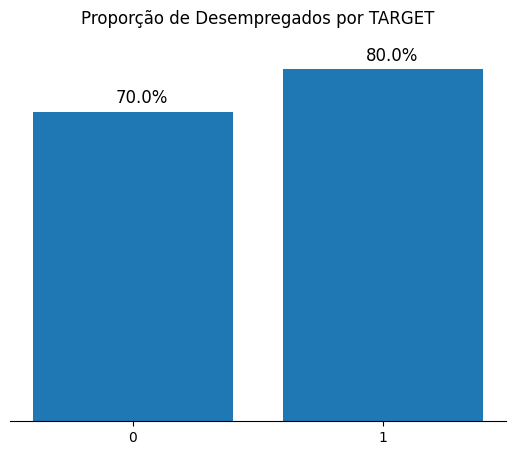

In [22]:
# Vamos evidenciar a diferença com um gráfico.
num_unemp_0, num_unemp_1= gb_employed.xs(0, level=1)  # Número de desempregados por TARGET.
prop_unemp = [num_unemp_0/len(df_train_0), num_unemp_1 / len(df_train_1)]

# Invocando `bar_plot` para gerarmos o gráfico.
bar_prop([0,1], prop_unemp, 'Proporção de Desempregados por TARGET')

<h3 style='font-size:30px;font-style:italic'> EDA Histórico Parcelas </h3>
<div> 
    <ul style='font-size:20px'>
        <li> 
            Nesta EDA, estudaremos o pagamento das parcelas de empréstimos anteriores do cliente com a nossa instituição.
        </li>
     </ul>
</div>

In [23]:
# Carregando a base de parcelas de empréstimos anteriores com o banco.
df_installments = pd.read_csv('/kaggle/input/home-credit-default-risk/installments_payments.csv')

# Agregando a coluna de TARGET da basse principal.
df_installments = df_installments.merge(df_train[['TARGET', 'SK_ID_CURR']], how='inner', left_on='SK_ID_CURR', right_on='SK_ID_CURR')
df_installments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,TARGET
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360,0
1,2452854,161674,1.0,21,-546.0,-552.0,11302.605,11302.605,0
2,1054186,161674,1.0,2,-1300.0,-1307.0,6948.360,6948.360,0
3,1682318,161674,1.0,2,-240.0,-243.0,7374.510,7374.510,0
4,2452854,161674,1.0,10,-876.0,-882.0,11302.605,11302.605,0


<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> Pagamento Completo das Parcelas</h4>
<div> 
    <ul style='font-size:20px'>
        <li> 
            Verificando se os clientes tidos como inadimplentes já possuíam um costume maior de não pagarem a totalidade das suas parcelas.
        </li>
     </ul>
</div>

In [24]:
# Criando uma coluna de FLAG de pagamentos menores do que o acordado.
df_installments['LOWER_PAYMENT'] = (df_installments['AMT_INSTALMENT']>df_installments['AMT_PAYMENT']).astype(np.int8)

In [25]:
# `df_lower_pymt` armazenará um indicador binário sinalizando se o dado cliente já realizou pagamentos menores em qualquer um dos empréstimos.
df_lower_pymt = (df_installments.groupby(['SK_ID_CURR', 'TARGET'])['LOWER_PAYMENT'].sum()>0).astype('int8').reset_index()

# Já que estamos analisando todo o histórico do cliente, vamos trocar o nome da coluna-índice para não nos confundirmos com a 'LOWER_PAYMENT'.
df_lower_pymt.rename({'LOWER_PAYMENT': 'LOWER_PAYMENT_EVER'}, axis=1, inplace=True)

# Agrupando os dados para que tenhamos a contagem das classes de LOWER_PAYMENT_EVER para cada uma das TARGET's
gb_lower_pymt = df_lower_pymt.groupby(['TARGET', 'LOWER_PAYMENT_EVER'])['SK_ID_CURR'].count()
gb_lower_pymt

TARGET  LOWER_PAYMENT_EVER
0       0                     136615
        1                      99536
1       0                      10880
        1                      10992
Name: SK_ID_CURR, dtype: int64

In [26]:
# Fazendo um novo Teste de Hipóteses (alpha=.05)

# H0: Os clientes em dia deixam de pagar a totalidade das parcelas com a mesma frequência que os inadimplentes.
# H1: Os clientes em dia deixam de pagar a totalidade das parcelas com uma frequência menor do que os inadimplentes.

# Como o p-valor apresentado é menor do que alpha, podemos rejeitar H0.
hypo_prop(gb_lower_pymt, 1, 'smaller', 'ratio')

3.848994289406585e-134

Text(0.5, 0, 'TARGET')

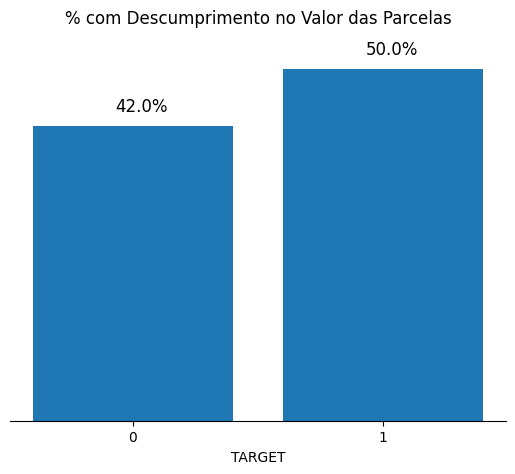

In [27]:
num_pymt_target_0, num_pymt_target_1 = gb_lower_pymt.groupby(level=0).sum() # Total de clientes por TARGET.
num_gb_pymt_0, num_gb_pymt_1 = gb_lower_pymt.xs(1, level=1) # Total de clientes que não cobriram toda a parcela por TARGET.

# Plotando o gráfico evidenciando a diferença apontada pelo Teste de Hipóteses.
bar_prop([0,1], [num_gb_pymt_0/num_pymt_target_0, num_gb_pymt_1/num_pymt_target_1], '% com Descumprimento no Valor das Parcelas')
plt.xlabel('TARGET') # Apenas acrescentando uma denominação ao eixo-x.

<h2 style='font-size:30px'> Desafio 3</h2>
<div> 
    <ul style='font-size:20px'>
        <li> 
            Nas análises apresentadas, constatamos que ambos os tipos de clientes apresentam padrões distintos em seus dados. Sendo assim, podemos crer que os nossos datasets estão adequados para abastecer um modelo de I.A.
        </li>
    </ul>
</div>

In [28]:
filenames = ['bureau.csv', 'POS_CASH_balance.csv', 'credit_card_balance.csv', 'previous_application.csv', 'installments_payments.csv']

# A classe `Dataset` garantirá a consolidação de todos os dados do projeto em um DataFrame com datatypes numéricos.
class Dataset:
    PATH = '/kaggle/input/home-credit-default-risk/' # Path do diretório dos arquivos do projeto.
    def __init__(self, filenames:Iterable[str]=filenames):
        '''
            Classe que tratará os dados do projeto, tornando-os uma única matriz.
            
            Parâmetros
            ----------
            `filenames`: Iterable[str]
                Objeto iterável com os nomes dos arquivos a serem usado.
        '''
        self.filenames = [Dataset.PATH+filename for filename in filenames]
        
    @staticmethod
    def _read_data(path)->pd.DataFrame:
        '''
            Função que lerá um arquivo do projeto, agregando a ele a coluna de TARGET do 'application_train.csv' quando necessário.
            
            Parâmetro
            ---------
            path: str
                Path do arquivo.
                
            Retorna
            -------
            Um DataFrame contendo os dados do arquivo.
        '''
        global df_train # Vamos recorrer à base principal para agregarmos as TARGET's ao dataset.

        # Lendo a planilha. Caso se trate do 'bureau.csv', carregarei a planilha juntamente com as informações da 'bureau_balance.csv'. 
        if 'bureau.csv' in path:
            df_bureau = pd.read_csv('/kaggle/input/home-credit-default-risk/bureau.csv')
            df_bureau_balance = pd.read_csv('/kaggle/input/home-credit-default-risk/bureau_balance.csv')
            
            # Juntando ambas as tabelas e acrescentando a coluna de TARGET.
            df = df_bureau.merge(df_bureau_balance, how='inner', left_on='SK_ID_BUREAU', right_on='SK_ID_BUREAU') 
            df = df.merge(df_train[['SK_ID_CURR', 'TARGET']], how='inner', left_on='SK_ID_CURR', right_on='SK_ID_CURR')
            df.drop('SK_ID_BUREAU', axis=1, inplace=True) # Desconsiderando coluna do empréstimo passado.
        else:
            # Só precisamos acrescentar  TARGET quando não estamos lidando com as bases principais.  
            if 'application_' not in path:
                df = pd.read_csv(path).merge(df_train[['SK_ID_CURR', 'TARGET']], how='inner', left_on='SK_ID_CURR', right_on='SK_ID_CURR')
                # Desconsiderando coluna com o ID do empréstimo passado.
                df.drop('SK_ID_PREV', axis=1, inplace=True)
            else:
                df = pd.read_csv(path)
        return df
    
    @staticmethod
    def __groupby_dataset_num(path:str, df:pd.DataFrame, col:str):
        '''
            Função-auxiliar da `Dataset._dataset_num`, que extrairá as contagens das categorias baseadas no set de treino, caso estejamos
            tratando o set de teste. Isso se faz necessário para a substituição dos valores string por numéricos.
            
            Parâmetros
            ----------
            `path`: str
                Path do arquivo
            `df`: str
                `pd.DataFrame` a sofrer o agrupamento.
            `col`: str
                Coluna string a participar do agrupamento.
                
            Retorna
            -------
            Uma `pd.Series` com a contagem de instâncias em cada categoria por TARGET.
        '''
        global df_train
        if 'test' in path:
            return df_train.groupby(['TARGET', col])['SK_ID_CURR'].count()
        return df.groupby(['TARGET', col])['SK_ID_CURR'].count()
    
    def _dataset_num(self, path:str)->pd.DataFrame:
        '''
            Função que converterá as colunas object do projeto em numéricas.
            
            Para cada categoria, será sinalizada a proporção de indivíduos inadimplentes no set de treino que pertencem a ela.
            
            Parâmetro
            ---------
            path: str
                Path do arquivo.
                
            Retorna
            -------
            Um `pd.DataFrame` com todas as colunas numéricas.
        '''
        # Lendo o arquivo.
        df = self._read_data(path) 

        # Aqui, nos preocuparemos apenas em transformar os dados das colunas string em números.
        dtypes = df.dtypes[df.dtypes=='object']
        
        # Aplicando as transformações.
        for col in dtypes.index:
            # Para cada categoria, será sinalizada a proporção de clientes em atraso que pertencem a ela. 
            # Por exemplo, no lugar da categoria 'M' da coluna CODE_GENDER, colocaremos a proporção dos homens que são inadimplentes no set de treino.
            gb = self.__groupby_dataset_num(path, df, col) #df.groupby(['TARGET', col])['SK_ID_CURR'].count()
            amount_cat = gb.groupby(level=1).sum() # Quantidade de instâncias em cada categoria.
            df_default_prop = gb.div(amount_cat, level=1).xs(1, level=0).reset_index() # Extraindo a proporção.
            df_default_prop.rename({'SK_ID_CURR':f'{col}_PROP'}, axis=1, inplace=True) # Renomeando a coluna para sinalizar a feature-origem

            # Vinculando a proporção da classe no lugar dos labels.
            df = df.merge(df_default_prop, left_on=col, right_on=col, how='inner')
            df.drop(col, axis=1, inplace=True)
        
        # Retornando o DataFrame. Como existe chance de um SK_ID_CURR ter mais de uma linha, vamos retornar
        # as médias das colunas de cada cliente.
        return df.groupby('SK_ID_CURR', as_index=False).mean()
    
    def make_dataset(self, main_file:str)->pd.DataFrame:
        '''
            Cria o dataset que usaremos na fase de modelagem. Ele conterá todos os dados das planilhas que o projeto disponibilizou
            em formato numérico.
            
            Parâmetro
            ---------
            `main_file`: str
                Nome do arquivo principal (base de clientes) a ser usada.
                
            Retorna
            -------
            Um `pd.DataFrame` com os dados do projeto em formato numérico.
        '''
        df = self._dataset_num(Dataset.PATH + main_file)
        for path in self.filenames:
            new_df = self._dataset_num(path).drop('TARGET', axis=1) # Removendo a TARGET impedir data leakage na fase de modelagem.
            df = df.merge(new_df, how='left', left_on='SK_ID_CURR', right_on='SK_ID_CURR')
        return df

In [29]:
# Finalmente, gerando o nosso set de treino tratado
train = Dataset().make_dataset('application_train.csv')
train.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_PROP_x,CODE_GENDER_PROP,FLAG_OWN_CAR_PROP,FLAG_OWN_REALTY_PROP,NAME_TYPE_SUITE_PROP_x,NAME_INCOME_TYPE_PROP,NAME_EDUCATION_TYPE_PROP,NAME_FAMILY_STATUS_PROP,NAME_HOUSING_TYPE_PROP,OCCUPATION_TYPE_PROP,WEEKDAY_APPR_PROCESS_START_PROP_x,ORGANIZATION_TYPE_PROP,FONDKAPREMONT_MODE_PROP,HOUSETYPE_MODE_PROP,WALLSMATERIAL_MODE_PROP,EMERGENCYSTATE_MODE_PROP,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY_y,MONTHS_BALANCE_x,CREDIT_ACTIVE_PROP,CREDIT_CURRENCY_PROP,CREDIT_TYPE_PROP,STATUS_PROP,MONTHS_BALANCE_y,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD_x,SK_DPD_DEF_x,NAME_CONTRACT_STATUS_PROP_x,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD_y,SK_DPD_DEF_y,NAME_CONTRACT_STATUS_PROP_y,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,NAME_CONTRACT_TYPE_PROP_y,WEEKDAY_APPR_PROCESS_START_PROP_y,FLAG_LAST_APPL_PER_CONTRACT_PROP,NAME_CASH_LOAN_PURPOSE_PROP,NAME_CONTRACT_STATUS_PROP,NAME_PAYMENT_TYPE_PROP,CODE_REJECT_REASON_PROP,NAME_TYPE_SUITE_PROP_y,NAME_CLIENT_TYPE_PROP,NAME_GOODS_CATEGORY_PROP,NAME_PORTFOLIO_PROP,NAME_PRODUCT_TYPE_PROP,CHANNEL_TYPE_PROP,NAME_SELLER_INDUSTRY_PROP,NAME_YIELD_GROUP_PROP,PRODUCT_COMBINATION_PROP,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTAL

In [30]:
# Salvando `train` em formato .parquet.
train.to_parquet('/kaggle/working/train.parquet')

In [31]:
Dataset().make_dataset('application_test.csv')

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_PROP_x,CODE_GENDER_PROP,FLAG_OWN_CAR_PROP,FLAG_OWN_REALTY_PROP,NAME_TYPE_SUITE_PROP_x,NAME_INCOME_TYPE_PROP,NAME_EDUCATION_TYPE_PROP,NAME_FAMILY_STATUS_PROP,NAME_HOUSING_TYPE_PROP,OCCUPATION_TYPE_PROP,WEEKDAY_APPR_PROCESS_START_PROP_x,ORGANIZATION_TYPE_PROP,FONDKAPREMONT_MODE_PROP,HOUSETYPE_MODE_PROP,WALLSMATERIAL_MODE_PROP,EMERGENCYSTATE_MODE_PROP,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY_y,MONTHS_BALANCE_x,CREDIT_ACTIVE_PROP,CREDIT_CURRENCY_PROP,CREDIT_TYPE_PROP,STATUS_PROP,MONTHS_BALANCE_y,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD_x,SK_DPD_DEF_x,NAME_CONTRACT_STATUS_PROP_x,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD_y,SK_DPD_DEF_y,NAME_CONTRACT_STATUS_PROP_y,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,NAME_CONTRACT_TYPE_PROP_y,WEEKDAY_APPR_PROCESS_START_PROP_y,FLAG_LAST_APPL_PER_CONTRACT_PROP,NAME_CASH_LOAN_PURPOSE_PROP,NAME_CONTRACT_STATUS_PROP,NAME_PAYMENT_TYPE_PROP,CODE_REJECT_REASON_PROP,NAME_TYPE_SUITE_PROP_y,NAME_CLIENT_TYPE_PROP,NAME_GOODS_CATEGORY_PROP,NAME_PORTFOLIO_PROP,NAME_PRODUCT_TYPE_PROP,CHANNEL_TYPE_PROP,NAME_SELLER_INDUSTRY_PROP,NAME_YIELD_GROUP_PROP,PRODUCT_COMBINATION_PROP,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AM


<p style='color:red'> Função para montagem do dataset. Continuar Evaluation</p>